![](https://www.nasa.gov/sites/default/files/thumbnails/image/nasa-logo-web-rgb.png)

# Planetary Mystery

Welcome to your first day as a data intern for NASA! As a fun exercise, all interns will be working to solve... a planetary mystery!

The dataset you will be working on contains weather data for a planet in our solar system, but the identity of that planet is unknown. Your task is to use your data analytics chops to identify the mystery planet!

As usual, you will begin by exploring your dataset.

The dataset, provided by NASA, is called `planet_weather.csv`, and it contains the following information:

- **terrestrial_date**: Date on planet Earth, captured as `yyyy-mm-dd`.

- **sol**: number of elapsed planetary days since beginning measurement.

- **ls**: solar longitude. 0: fall equinox. 90: winter solstice. 180: spring equinox. 270: summer solstice.

- **month**: the month number on the mystery planet.

- **min_temp**: the minimum temperature, in Celsius, during a single day.

- **pressure**: atmospheric pressure, in Pascals.

- **wind_speed**: average wind speed, in meters per second.

- **atmo_opacity**: atmospheric opacity.



# Task 1: Data Inspection

![](https://media.giphy.com/media/pz7LNMYN2dj0hgKaHj/giphy.gif)

In [1]:
# import pandas and plotly express libraries
import pandas as pd
import plotly.express as px

In [2]:
# load planet_weather.csv data from datasets folder
nf = pd.read_csv("datasets/planet_weather.csv")

In [3]:
# preview the data
nf.sample(5)

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
1245,651,2014-08-02,707,171,Month 6,-76.0,1.0,749.0,NaN,Sunny
1184,712,2014-10-04,768,207,Month 7,-73.0,2.0,826.0,NaN,Sunny
952,948,2015-06-10,1011,355,Month 12,-78.0,-12.0,845.0,NaN,Sunny
1780,26,2012-12-08,121,221,Month 8,-66.0,0.0,869.0,NaN,Sunny
640,1254,2016-04-29,1326,144,Month 5,-77.0,-15.0,738.0,NaN,Sunny


In [5]:
# How many rows and columns are there in the dataset?
nf.shape

(1894, 10)

In [6]:
# what are the names of all the columns?
nf.columns

Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'max_temp',
       'pressure', 'wind_speed', 'atmo_opacity'],
      dtype='object')

In [9]:
# What is the data type of each column?
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1894 non-null   int64  
 1   terrestrial_date  1894 non-null   object 
 2   sol               1894 non-null   int64  
 3   ls                1894 non-null   int64  
 4   month             1894 non-null   object 
 5   min_temp          1867 non-null   float64
 6   max_temp          1867 non-null   float64
 7   pressure          1867 non-null   float64
 8   wind_speed        0 non-null      float64
 9   atmo_opacity      1894 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 148.1+ KB


In [10]:
# How many null values are there in each column?
nf.isnull().sum()

id                     0
terrestrial_date       0
sol                    0
ls                     0
month                  0
min_temp              27
max_temp              27
pressure              27
wind_speed          1894
atmo_opacity           0
dtype: int64

In [11]:
# Provide a statistical summary of the DataFrame
nf.describe()

,id,sol,ls,min_temp,max_temp,pressure,wind_speed
count,1894.000000,1894.000000,1894.000000,1867.000000,1867.000000,1867.000000,0.0
mean,948.372228,1007.930306,169.180570,-76.121050,-12.510445,841.066417,NaN
std,547.088173,567.879561,105.738532,5.504098,10.699454,54.253226,NaN
min,1.000000,1.000000,0.000000,-90.000000,-35.000000,727.000000,NaN
25%,475.250000,532.250000,78.000000,-80.000000,-23.000000,800.000000,NaN
50%,948.500000,1016.500000,160.000000,-76.000000,-11.000000,853.000000,NaN
75%,1421.750000,1501.750000,259.000000,-72.000000,-3.000000,883.000000,NaN
max,1895.000000,1977.000000,359.000000,-62.000000,11.000000,925.000000,NaN


# Task 2: Data Cleaning

![](https://media.giphy.com/media/l49JEBkw8tD64fbeE/giphy-downsized-large.gif)

In [13]:
# Looks like the wind speed sensor on the Rover was broken
# Delete wind_speed column, which is filled with null values
nf = nf.drop('wind_speed', axis=1)

In [17]:
# How many unique values are there in the atmo_opacity column?
# hint: both .unique() and .value_counts() will work here
nf_unique = nf['atmo_opacity'].value_counts()
print(nf_unique)

Sunny    1891
--          3
Name: atmo_opacity, dtype: int64


In [19]:
# The atmosphere sensors were faulty and did not capture accurate data
# Delete atmo_opacity column, which mostly contains identical values
nf = nf.drop('atmo_opacity', axis=1)

# Task 3: Data Analysis & Visualization

![](https://media.giphy.com/media/1n8aGJBEXuW0M7ELrB/giphy.gif)



In [25]:
# How many months are there on this planet?
nf_month = nf['month'].nunique()
print(nf_month)

12


In [74]:
# What is the average min_temp for each month?
aggregations 
nf_avgTemp = nf.groupby('month').agg({'min_temp':'mean'})
print(nf_avgTemp)

           min_temp
month              
Month 1  -77.160920
Month 10 -71.982143
Month 11 -71.985507
Month 12 -74.451807
Month 2  -79.932584
Month 3  -83.307292
Month 4  -82.747423
Month 5  -79.308725
Month 6  -75.299320
Month 7  -72.281690
Month 8  -68.382979
Month 9  -69.171642


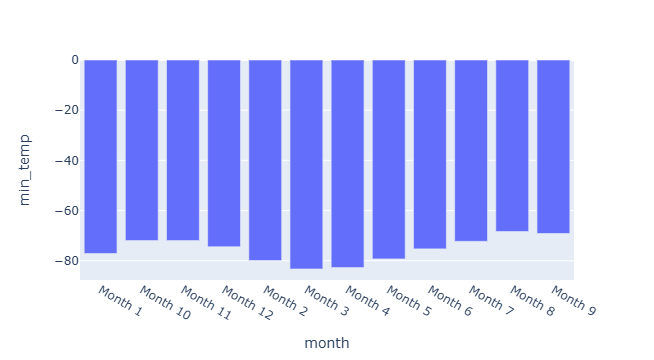

In [79]:
# Plot a bar chart of the average min_temp by month
bar = px.bar(nf_avgTemp, y='min_temp')
bar.update_layout(xaxis ={'categoryorder' : 'total descending'})
#bar.show()

Based on the minimum temperature, what is the coldest month? The warmest month?

warmest: Month 8
coldest: Month 3

In [95]:
# What is the average pressure for each month?
nf_avgPressure = nf.groupby('month').agg({'pressure':'mean'})
print(nf_avgPressure)

            pressure
month               
Month 1   862.488506
Month 10  887.312500
Month 11  857.014493
Month 12  842.156627
Month 2   889.455056
Month 3   877.322917
Month 4   806.329897
Month 5   748.557047
Month 6   745.054422
Month 7   795.105634
Month 8   873.829787
Month 9   913.305970


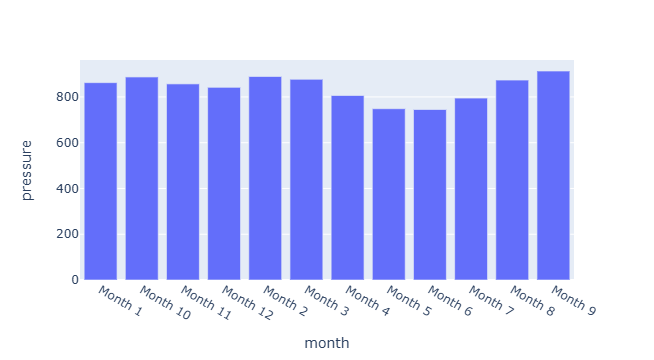

In [99]:
# Create a bar chart of the average atmospheric pressure by month
ps_bar = px.bar(nf_avgPressure, y='pressure')
#ps_bar.update_layout(xaxis ={'categoryorder' : 'total descending'})
ps_bar.show

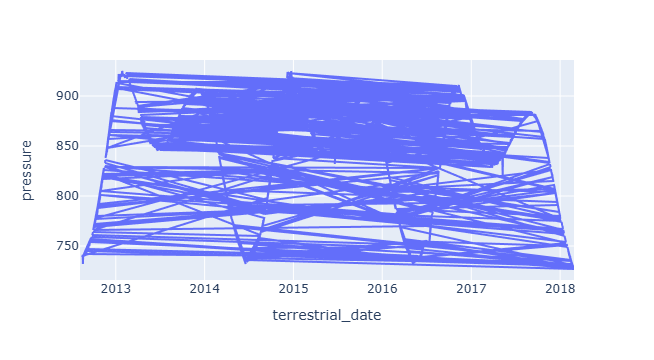

In [98]:
# Plot a line chart of the daily atmospheric pressure by terrestrial date
# note: you do not need to modify the dataframe
# use the original one you loaded at the beginning of the milestone.
px.line(data_frame=nf,
       x='terrestrial_date',
       y='pressure')


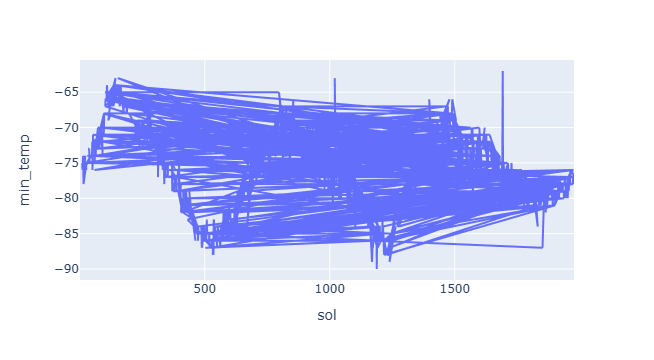

In [108]:
# Plot a line chart the daily minimum temp
# note: you do not need to modify the dataframe
# use the original one you loaded at the beginning of the milestone.
px.line(data_frame=nf,
        x='sol',
        y='min_temp')

### Based on this information, approximately how many earth days are there in a year on this planet?

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Note**: To get an approximate range for how long a "year" is on this planet, look at the plots of the atmospheric pressure and the temperatures by day. Use the visualizations to get a *rough estimate* between matching "peaks".</span>

687 days


### What is the identity of the planet?

Go to [this website](https://spaceplace.nasa.gov/years-on-other-planets/en/) and see what planet this lines up with!

Mars

## Congratulations on making your first extra-terrestrial discovery!

![](https://media.giphy.com/media/5ndfKr0Nv92LkWrKpU/giphy.gif)

# LevelUp

![](https://media.giphy.com/media/kjjRGpezebjaw/giphy.gif)

Earlier in the milestone you investigated how many months were in our Mystery Planet. Unfortunately, the answer (12) was not very satisfying. This is because there is no standard calendar for Mars. When the data was collected, they used 12 "months" though each month is longer than a typical Earth month. Let's investigate!

First, filter your dataset so that you are only looking at any `terrestrial_date` before 2014.

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Note**: Since the `terrestrial_date` is a `string` data type, this is simply checking for all values that satisfy the condition `< '2014'` (<-- don't forget the quotes!) </span>

In [113]:
# filter to all values where terrestrial_date is before 2014
# store it in a new variable.
nf_2014bf = nf[nf['terrestrial_date']<'2014']
print(nf_2014bf)

       id terrestrial_date  sol   ls    month  min_temp  max_temp  pressure
1543  352       2013-09-10  390   19  Month 1     -78.0     -16.0     875.0
1576  320       2013-08-01  351    0  Month 1     -75.0     -12.0     853.0
1575  319       2013-08-02  352    0  Month 1     -77.0      -9.0     854.0
1574  323       2013-08-03  353    1  Month 1     -75.0      -8.0     855.0
1573  322       2013-08-04  354    1  Month 1     -75.0     -13.0     857.0
...   ...              ...  ...  ...      ...       ...       ...       ...
1707  106       2013-02-23  196  269  Month 9     -66.0      -3.0     916.0
1716   96       2013-02-12  185  262  Month 9     -67.0      -5.0     923.0
1715   97       2013-02-13  186  263  Month 9     -66.0      -2.0     922.0
1750   59       2013-01-08  151  240  Month 9     -65.0      -3.0     915.0
1749   60       2013-01-09  152  241  Month 9     -63.0       1.0     914.0

[441 rows x 8 columns]


<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>If done correctly, you will have a dataframe with `441` rows.</span>

Lastly, for each month in the dataframe, return both the `min` value and the `max` value of the `terrestrial_date` field.

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint 1**: Use `.groupby()`</span>

<span style='background-color: rgba(138, 43, 226, 0.4); padding: 0.2em 0.4em; border-radius: 4px;'>**Hint 2**: In the dictionary for your `.agg()` function, pass a `list` of values. e.g. `{col_to_check: [func1, func2]}`. Remember to use the appropriate values / variables from the dataframe and the desired functions.</span>

In [114]:
# For each month, calculate the min & max value of the terrestrial_date field.
min_max_dates = nf.groupby('month').agg({'terrestrial_date': ['min', 'max']})
print(min_max_dates)

         terrestrial_date            
                      min         max
month                                
Month 1        2013-08-01  2017-07-07
Month 10       2013-02-24  2017-01-16
Month 11       2013-04-13  2017-03-08
Month 12       2013-06-05  2017-05-05
Month 2        2013-10-03  2017-09-12
Month 3        2013-12-09  2017-11-19
Month 4        2014-02-16  2018-01-25
Month 5        2014-04-23  2018-02-27
Month 6        2012-08-07  2016-07-02
Month 7        2012-09-30  2016-08-24
Month 8        2012-11-20  2016-10-11
Month 9        2013-01-08  2016-11-28


How many Earth days, roughly, are there in each "month" in the mystery planet? Does that lineup with what you expected now that you know the identity of the mystery planet?

there approximately 1406 - 1441 earth days, this aligns well with expectations for Martian atmospheric data, suggesting Mars as the mystery planet